# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [33]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

from sklearn import metrics

In [34]:
from google.colab import drive
drive.mount('/gdrive')

%cd /gdrive/My Drive/Colab Notebooks/Ensemble Techniques/Week 2

easyvisa_1 = pd.read_csv("EasyVisa.csv")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Colab Notebooks/Ensemble Techniques/Week 2


In [35]:
# copying data to another variable to avoid any changes to original data
easyvisa = easyvisa_1.copy()

## Data Overview

- Observations
- Sanity checks

In [36]:
easyvisa.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [37]:
easyvisa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


*  Out of 12 columns we have 9 objects, and 3 numerical.  All columns appears to fit the right description with looking at the data of the first 5 columns in the head.

In [38]:
easyvisa.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

*  No missing data

In [39]:
# Summary of continuous columns
easyvisa.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


* The year of establish should be changed to a traditional number.  We could subtract 2017 minus 1800 to get the number of years during the feature engineering.

* Wages seem range between 2.13 most likely low skill like waiter to high skill STEM.

* The negative employees is concerning and should be further investigated as negative employees is most likely incorrect.

In [40]:
easyvisa.nunique()

case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

* We can drop 'case_id' column as it is an ID variable and will not add value to the model.
* We cannot drop prevailing wage as its a significant factor in determining visa
* We cannot drop no_of_employees as this is a measurement to see if the company is fair to hiring citizens vs external employment
* The yr_of_estab will changed to number of years during feature engineering

In [41]:
# copying data to another variable to avoid any changes to original data
easyvisa2 = easyvisa_1.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [42]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [43]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

### Univariate analysis

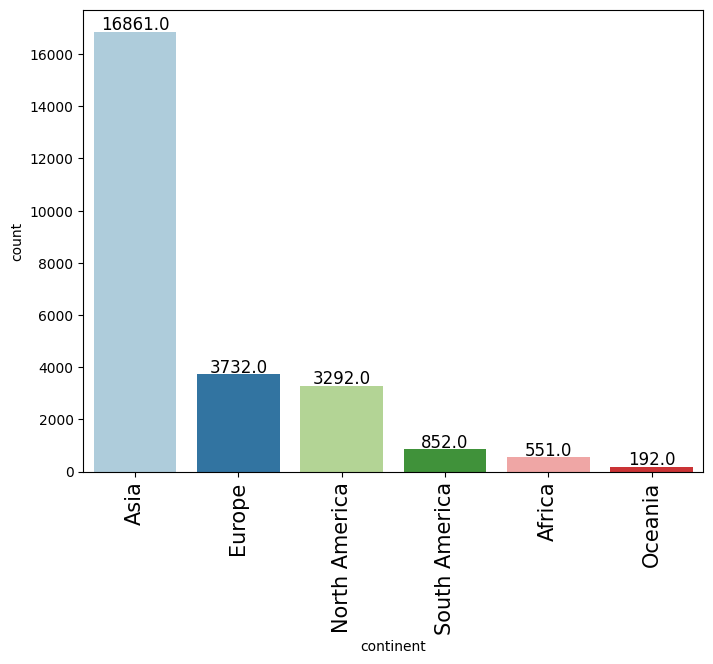

In [44]:
labeled_barplot(easyvisa2, "continent")

* Majority of visas are from Asia

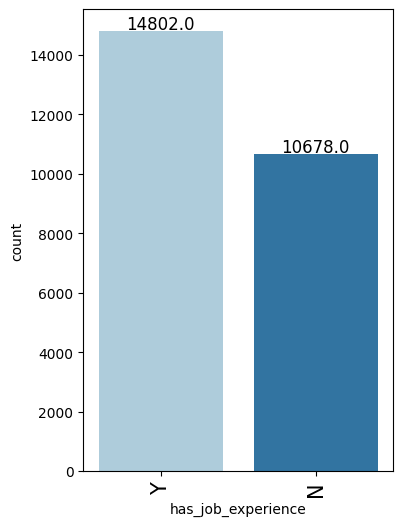

In [45]:
labeled_barplot(easyvisa2, "has_job_experience")

* 58% of applicants have job experience

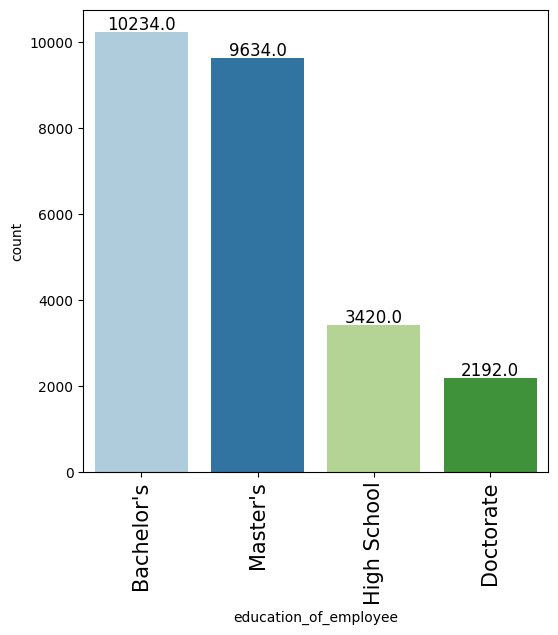

In [46]:
labeled_barplot(easyvisa2, "education_of_employee")

* Education plays a signficant role in those who apply as 86% of applicants are college educated and 14% have a high school diploma.

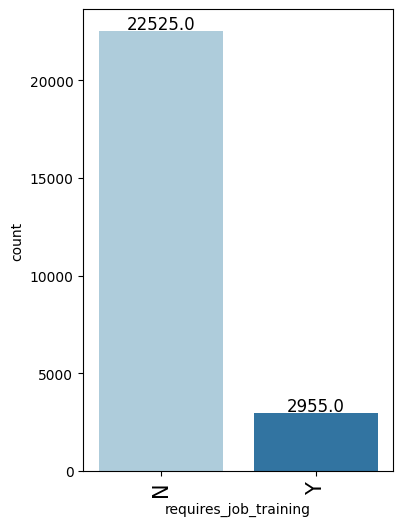

In [47]:
labeled_barplot(easyvisa2, "requires_job_training")

* 88% do not need job training

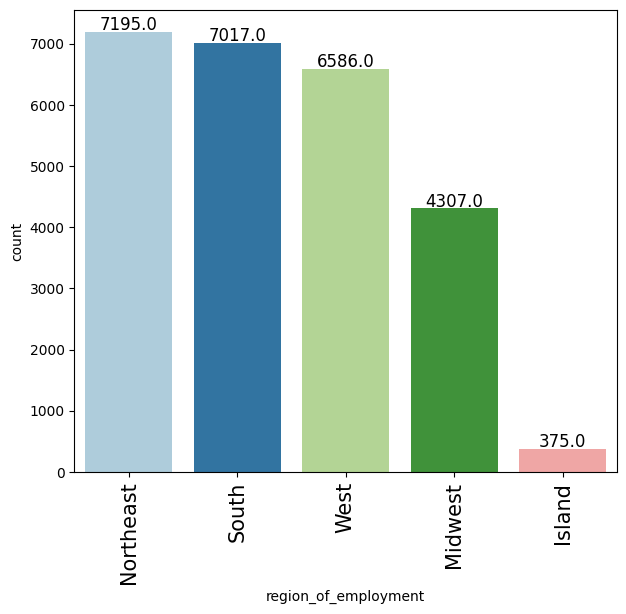

In [48]:
labeled_barplot(easyvisa2, "region_of_employment")

* Majority of workers in needed in mainland U.S.
* The midwest has to slowest need in the mainland most likely due the population density of the region

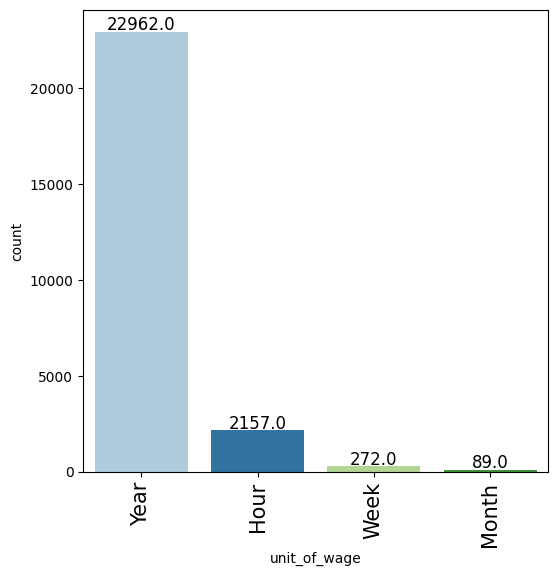

In [49]:
labeled_barplot(easyvisa2, "unit_of_wage")

* 90% of employees are yearly
* 8% are hourly

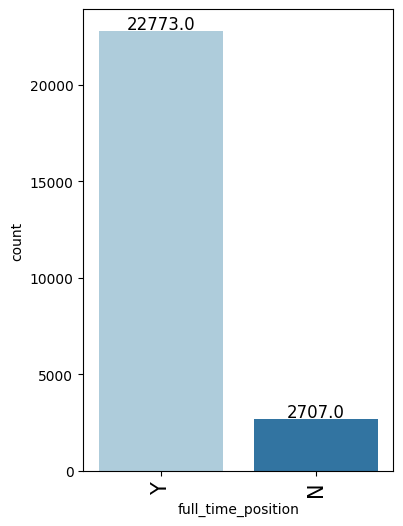

In [50]:
labeled_barplot(easyvisa2, "full_time_position")

* 89% of poistions are full-time
* 11% of positions are seasonal, temporary, or contract

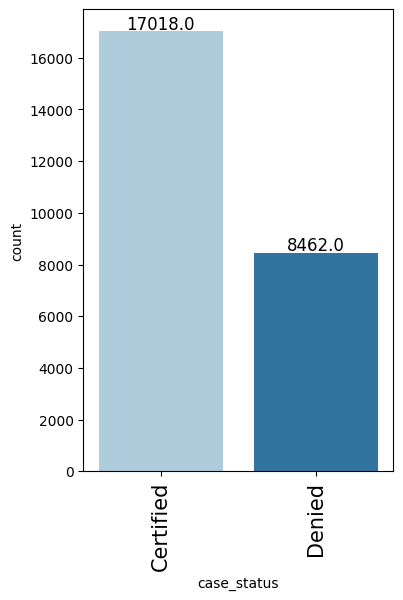

In [51]:
labeled_barplot(easyvisa2, "case_status")

* 67% of applications are certified
* 33% of aplications are denied

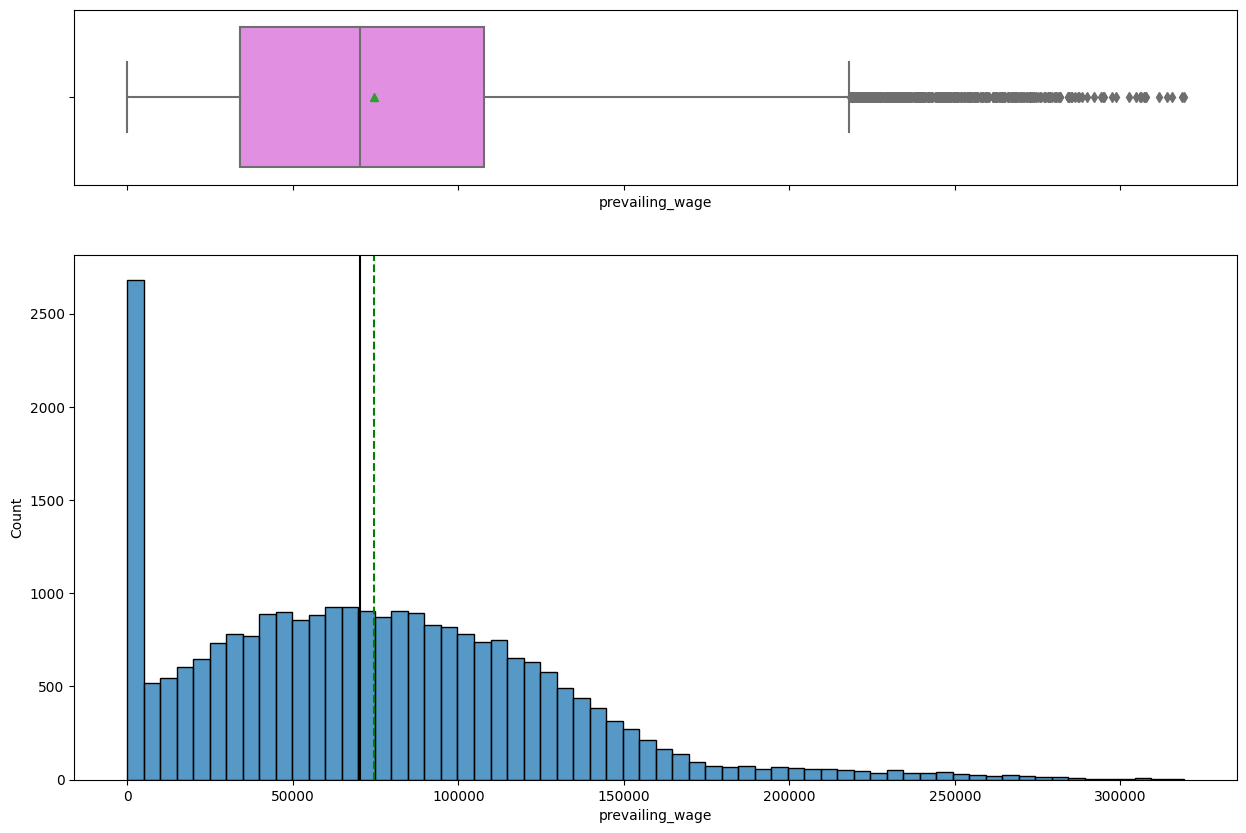

In [52]:
histogram_boxplot(easyvisa2,'prevailing_wage')

* Wages range from around 5k to over 300k
* The wages are right skewed with a number of outliers
* Mean and Median are close within 5k of each other

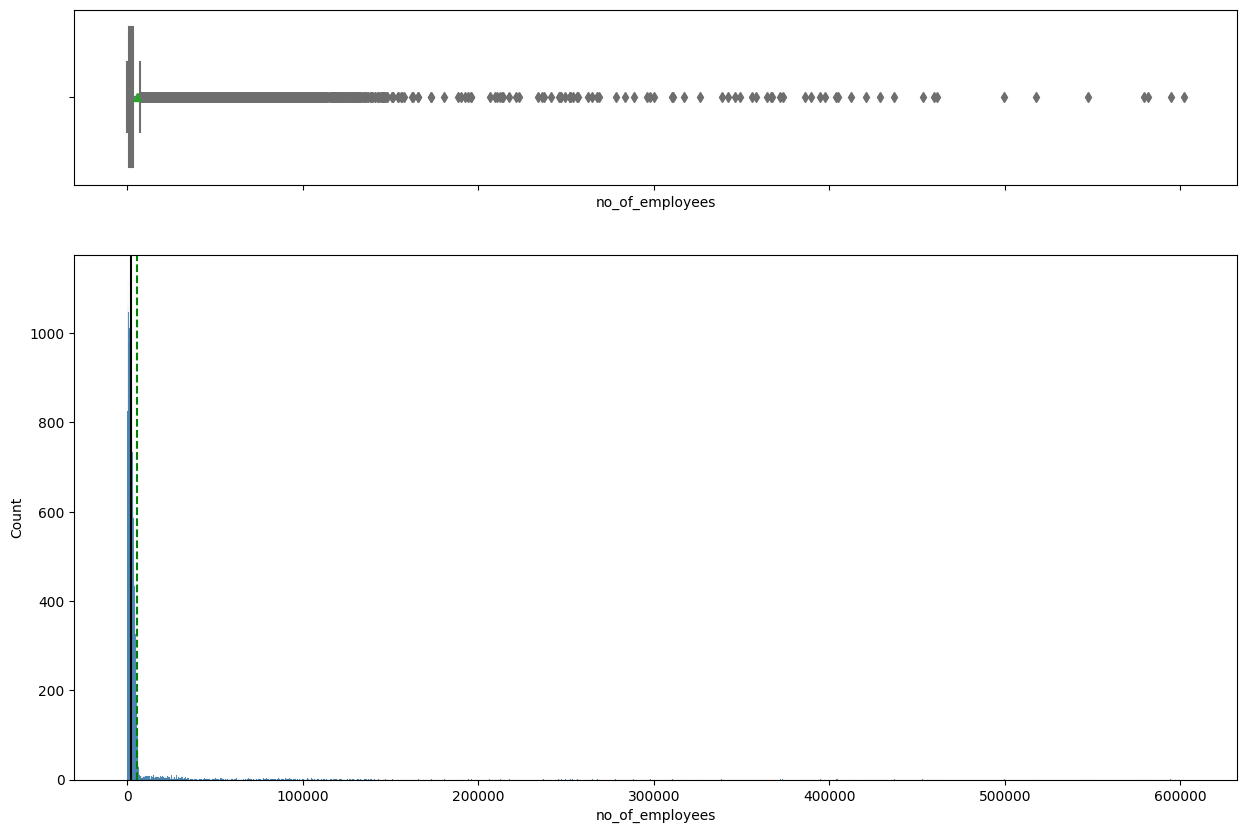

In [53]:
histogram_boxplot(easyvisa2,'no_of_employees')

* extremly lone right tail 
* Not alot of companies have a large number of employees

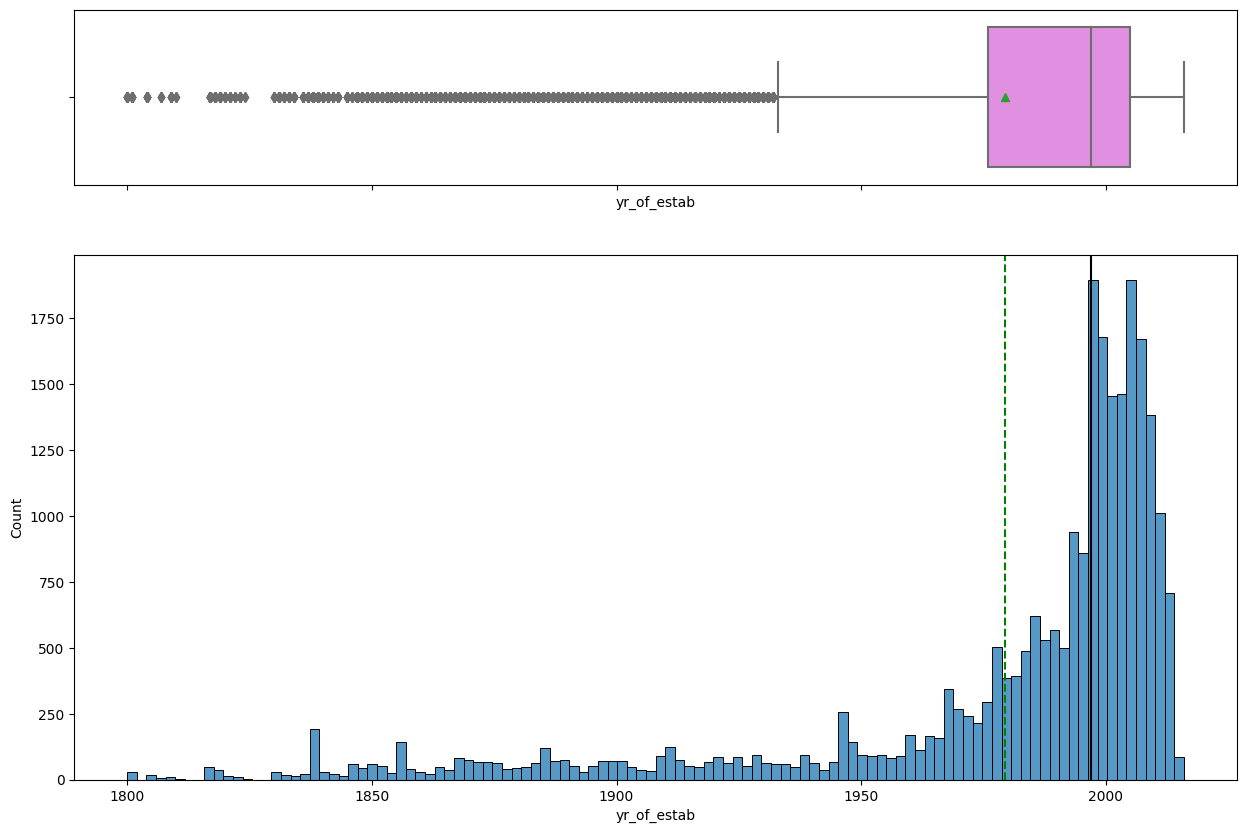

In [54]:
histogram_boxplot(easyvisa2,'yr_of_estab')

* extremly long left tail
* alot of outliers meaning most companies established around 1980 to present

### Bivariate analysis

In [55]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [56]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**Correlation Check**

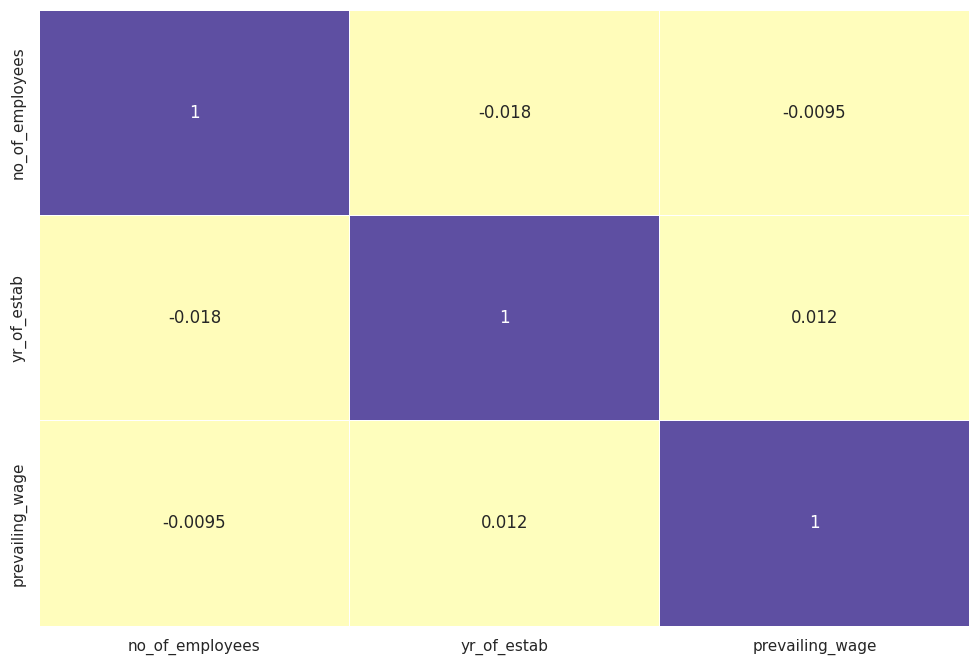

In [57]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(easyvisa2.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="Spectral")
plt.show()

* No correlation

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


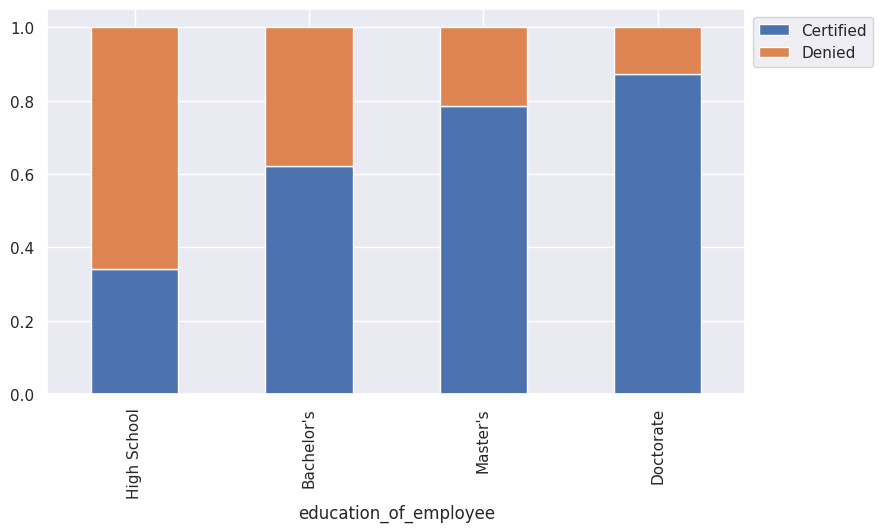

In [58]:

stacked_barplot(easyvisa2, "education_of_employee", "case_status")

* Education plays a significant in role in those who are certified.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


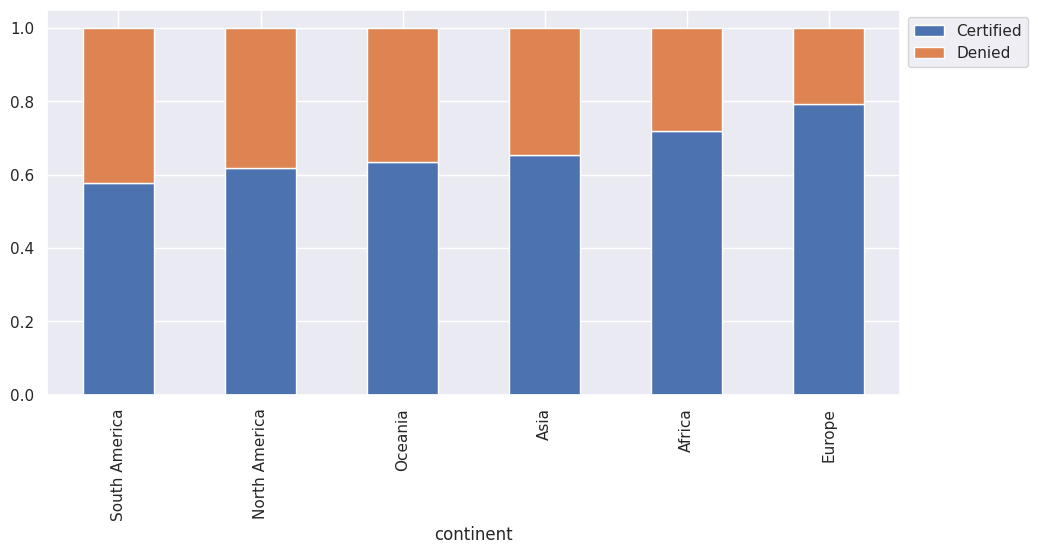

In [59]:
stacked_barplot(easyvisa2, "continent", "case_status")

* 65% of applications from Asia are certified
* 62% of applications from North America are certified 
* 79% of applications from Europe are certified
* 58% of applications from South America are certified 
* 72% of applciations from Africa are certified
* 63% of applications from Oceania are certified

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


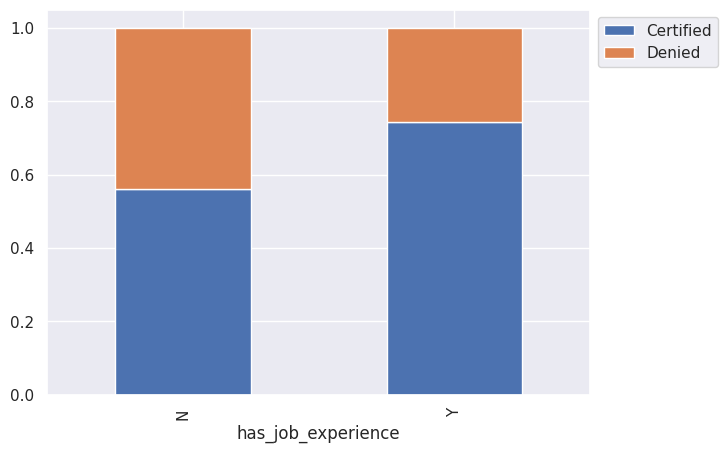

In [60]:
stacked_barplot(easyvisa2, "has_job_experience", "case_status")

* 74% of certified applicants have work experience

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


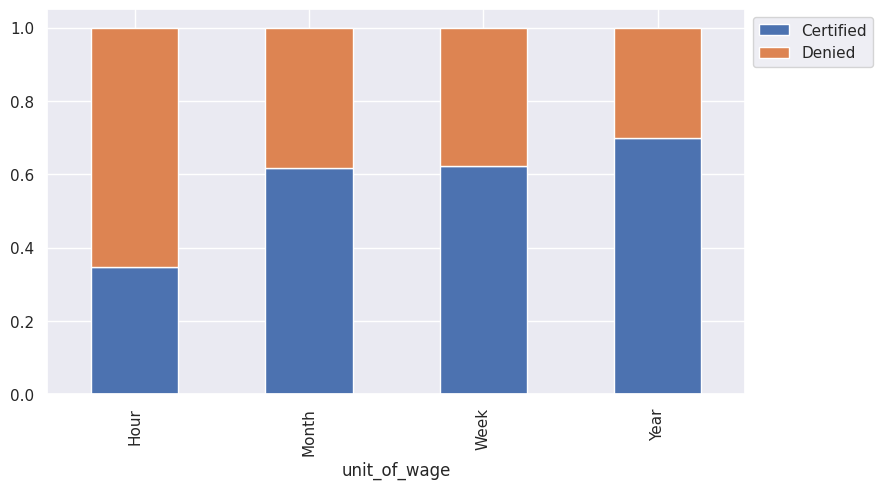

In [61]:
stacked_barplot(easyvisa2, "unit_of_wage", "case_status")

* Yearly is the most attractive pay category for certified applicants

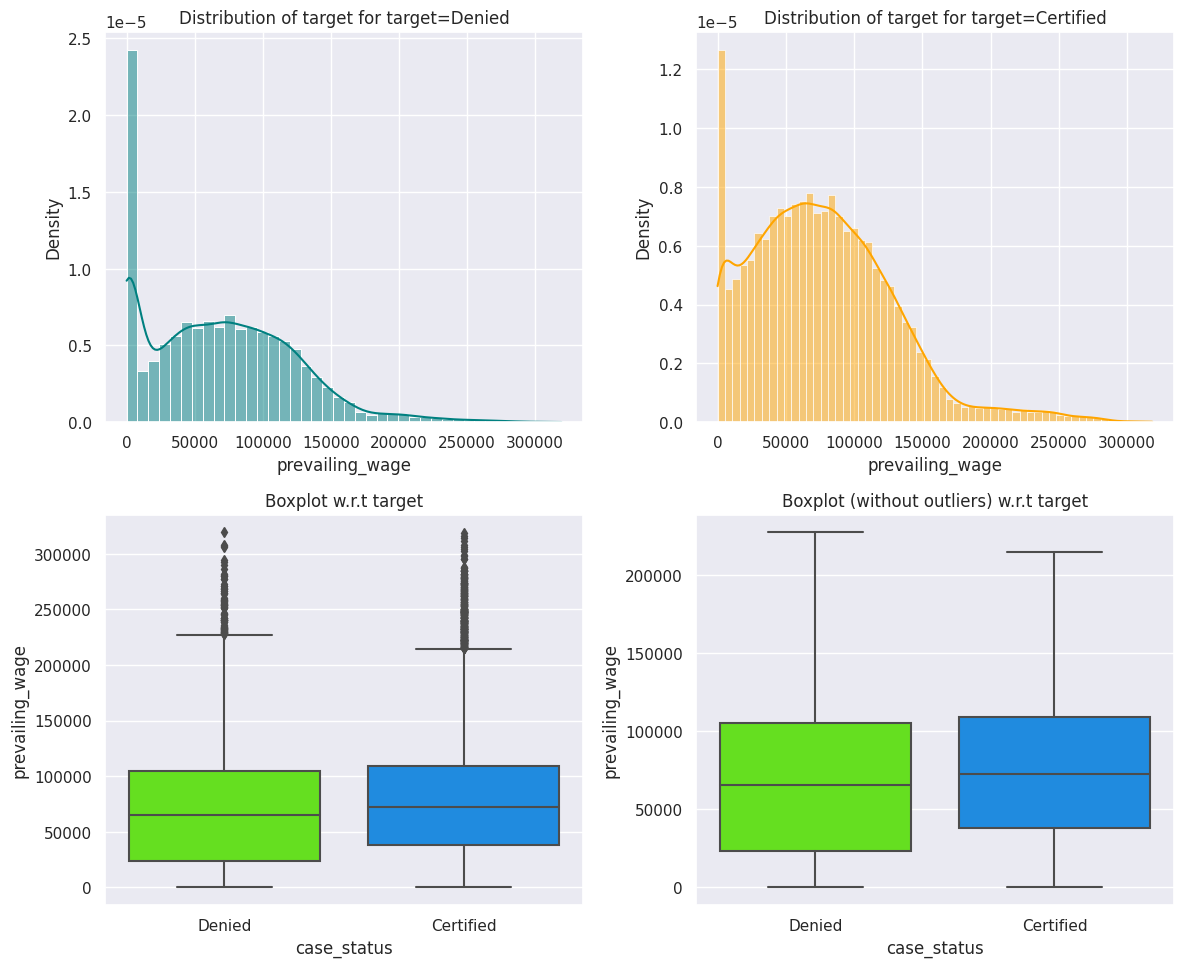

In [62]:
distribution_plot_wrt_target(easyvisa2, "prevailing_wage", "case_status")

* The median is higher for certified applicants vs those denied.

In [63]:
easyvisa2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [64]:
easyvisa2.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

* No missing values

In [65]:
#Dropping one columns from the dataframe
easyvisa2.drop(columns=['case_id'], inplace=True)

In [66]:
easyvisa2["number_of_years_estab"] = 2017 - easyvisa2["yr_of_estab"]
easyvisa2.drop(["yr_of_estab"], axis=1, inplace=True)
easyvisa2.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,number_of_years_estab
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,10
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,15
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,9
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,120
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,12


* yr_of_estab which was the year the company was established changed to number of operating years.  Do older companies employ more visas than newer companies?

In [67]:

easyvisa2['no_of_employees'] = easyvisa2['no_of_employees'].abs()

In [68]:
easyvisa2.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.089207,22877.917453,11.0000,1022.00,2109.00,3504.0000,602069.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
number_of_years_estab,25480.0,37.590071,42.366929,1.0000,12.00,20.00,41.0000,217.00


In [69]:
# Making a list of all catrgorical variables
cat_col = list(easyvisa2.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(easyvisa2[column].value_counts())
    print("-" * 50)

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
--------------------------------------------------
Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64
--------------------------------------------------
Y    22773
N     2707
Name: full_time_position, dty

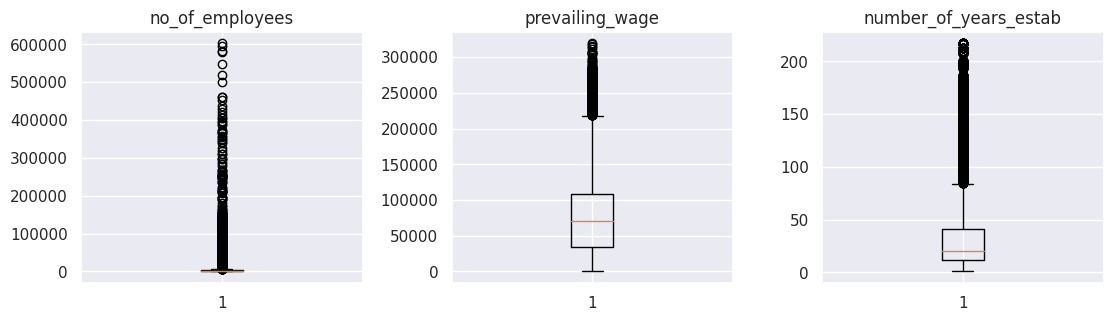

In [70]:
# outlier detection using boxplot
numeric_columns = easyvisa2.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(easyvisa2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## EDA

- It is a good idea to explore the data once again after manipulating it.

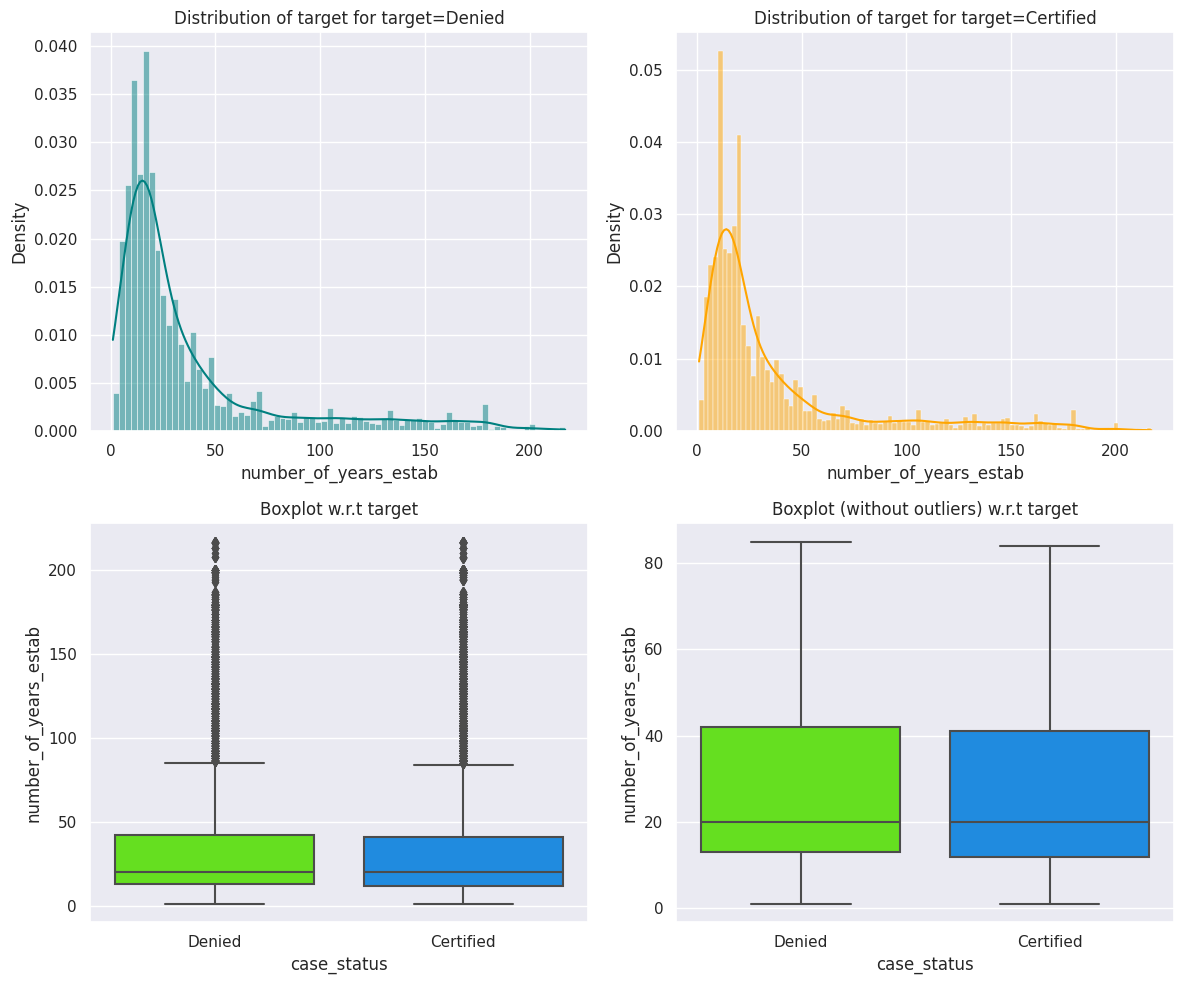

In [71]:
distribution_plot_wrt_target(easyvisa2, "number_of_years_estab", "case_status")

* It would appear that newer companies 25 yrs or less are highly dependant on visa applicants.

## Data Preparataion for model building

In [72]:
#easyvisa2.reset_index(drop=True, inplace=True)

In [73]:
easyvisa2["case_status"] = easyvisa2["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

X = easyvisa2.drop('case_status', axis=1) ## Complete the code to drop case status from the data
Y = easyvisa2["case_status"]


X = pd.get_dummies(X, drop_first=True)  ## Complete the code to create dummies for X 

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1, stratify=Y) ## Complete the code to split the data into train and test in the ratio 70:30

In [74]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


* We have 17,836 observations in the train set and 7,644 observations in the test set.

###Model evaluation criterion¶

**Model can make wrong predictions as:**
Model predicts that the visa application will get certified but in reality, the visa application should get denied.

Model predicts that the visa application will not get certified but in reality, the visa application should get certified.

**Which case is more important?**
Both the cases are important as:

If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy.

**How to reduce the losses?**

F1 Score can be used as the metric for evaluation of the model, greater the F1 score higher are the chances of minimizing False Negatives and False Positives.
We will use balanced class weights so that model focuses equally on both classes.
First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

The model_performance_classification_sklearn function will be used to check the model performance of models.
The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [75]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [76]:
# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, roc_auc_score, precision_recall_curve

In [77]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [78]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree Model- Model Building and Hyperparameter Tuning

####Decision Tree Model

In [79]:
# Specify Model
visa_model = DecisionTreeClassifier(random_state=1)
# Fit Model
visa_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

**Checking model performance on training set**

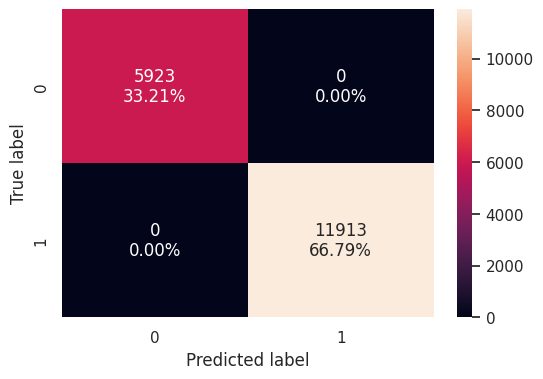

In [80]:
# creating confusion matrix
confusion_matrix_sklearn(visa_model, X_train, y_train)

In [81]:
decision_tree_perf_train = model_performance_classification_sklearn(visa_model, X_train, y_train) ## Complete the code to check performance on train data
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


* The model is overfitting

**Checking model performance on test set**

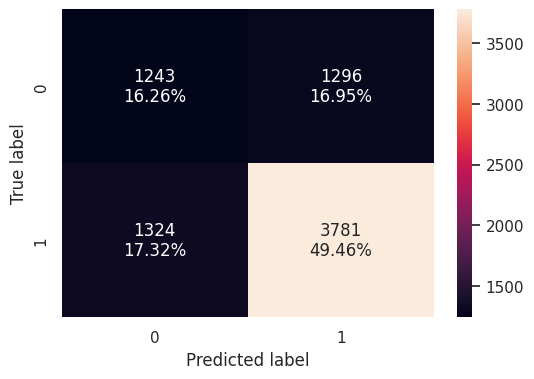

In [82]:
# creating confusion matrix
confusion_matrix_sklearn(visa_model, X_test, y_test)

In [83]:
decision_tree_perf_test = model_performance_classification_sklearn(visa_model, X_test, y_test) ## Complete the code to check performance on train data
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.657248,0.740646,0.744731,0.742683


* F1 is arounf 74%

####  Will tuning the hyperparameters improve the model performance?

In [84]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs = -1, cv=5) ## Complete the code to run grid search with n_jobs = -1

grid_obj = grid_obj.fit(X_train, y_train) ## Complete the code to fit the grid_obj on the train data

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

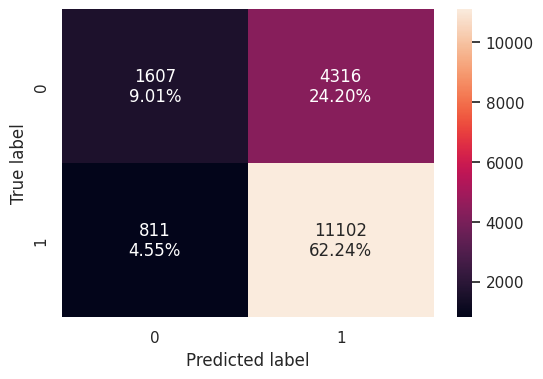

In [85]:
# creating confusion matrix
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)

In [86]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(dtree_estimator, X_train, y_train) ## Complete the code to check performance for train data on tuned estimator
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.712548,0.931923,0.720067,0.812411


* F1 decrease by 19% to 81% which is a better model with less noise

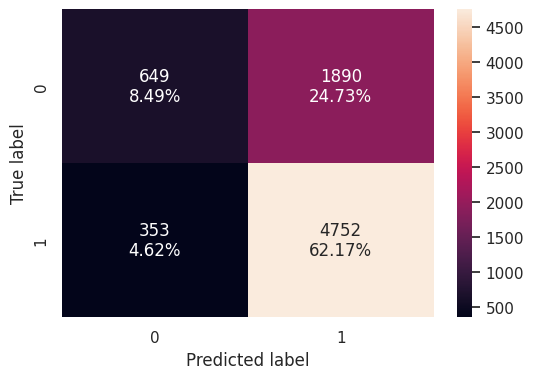

In [87]:
# creating confusion matrix
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

In [88]:
dtree_estimator_model_test_perf = model_performance_classification_sklearn(dtree_estimator, X_test, y_test) ## Complete the code to check performance for test data on tuned estimator
dtree_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.706567,0.930852,0.715447,0.809058


* F1 increased by nearly 6% from the preivous model showing a better model

## Building bagging and boosting models

In [91]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [89]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

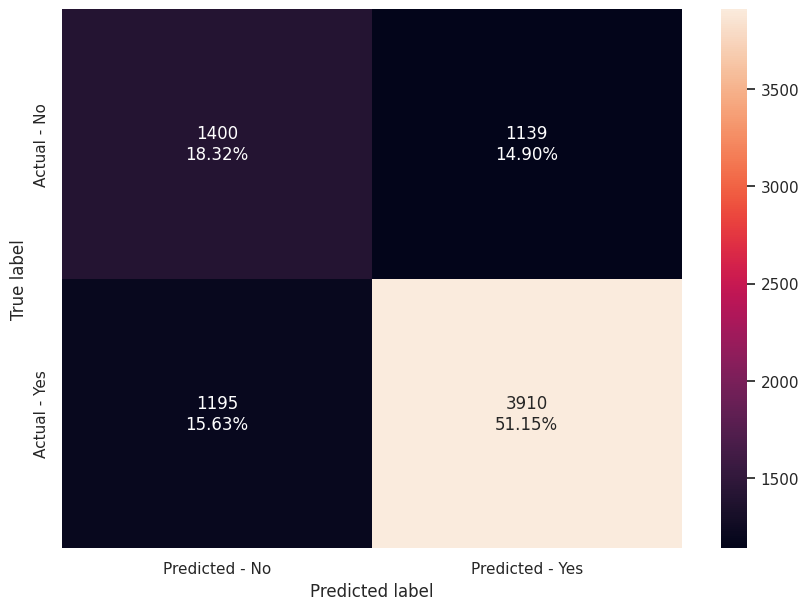

In [92]:
make_confusion_matrix(bagging_estimator,y_test)

In [93]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_estimator, X_train,y_train)
print("Training performance \n",bagging_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.985198  0.986066   0.991726  0.988888


In [94]:
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_estimator, X_test,y_test)
print("Training performance \n",bagging_classifier_model_test_perf)

Training performance 
    Accuracy    Recall  Precision       F1
0  0.694662  0.765916   0.774411  0.77014


* Training model overfit, but Test comes in around 77%

### Random Forest Classifier

In [95]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

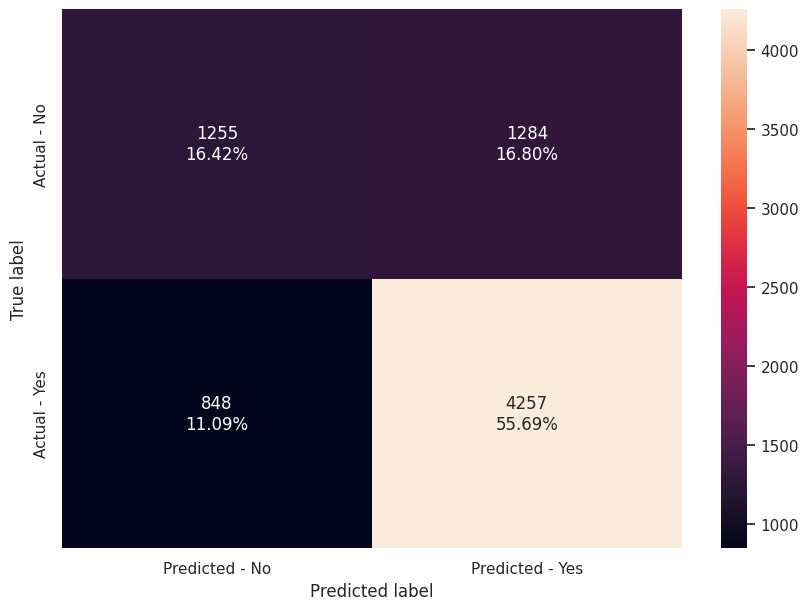

In [96]:
make_confusion_matrix(rf_estimator,y_test)

In [97]:
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator, X_train,y_train)
print("Training performance \n",rf_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [98]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator, X_test,y_test)
print("Training performance \n",rf_estimator_model_test_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.721088  0.833888   0.768273  0.799737


**With default parameters:**

- Both models - Bagging classifiers as well as random forest classifier are overfitting the train data and test data.
* Random Forest is slightly better

## Hyperparameter Tuning

### Bagging Classifier

**Some of the important hyperparameters available for bagging classifier are:**

- base_estimator: The base estimator to fit on random subsets of the dataset. If None(default), then the base estimator is a decision tree.
- n_estimators: The number of trees in the forest, default = 100.
- max_features: The number of features to consider when looking for the best split. 
- bootstrap: Whether bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree, default=True.
- bootstrap_features: If it is true, then features are drawn with replacement. Default value is False.
- max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, where N is the number of observations in the train data.
- oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy, default=False.

In [99]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_samples': [0.7,0.9,], 
              'max_features': [0.7,0.9],
              'n_estimators' : [90,111,10],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=111,
                  random_state=1)

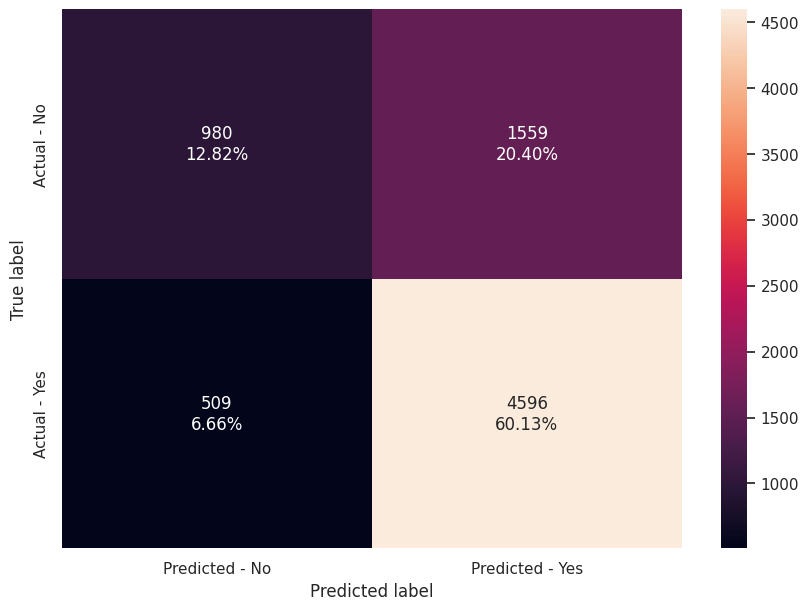

In [100]:
make_confusion_matrix(bagging_estimator_tuned,y_test)

In [101]:
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_train,y_train)
print("Training performance \n",bagging_estimator_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision       F1
0  0.994057  0.999748   0.991426  0.99557


In [102]:
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_test,y_test)
print("Training performance \n",bagging_estimator_tuned_model_test_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.729461  0.900294    0.74671  0.816341


In [103]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search

grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, n_jobs= -1, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=25,
                       oob_score=True, random_state=1)

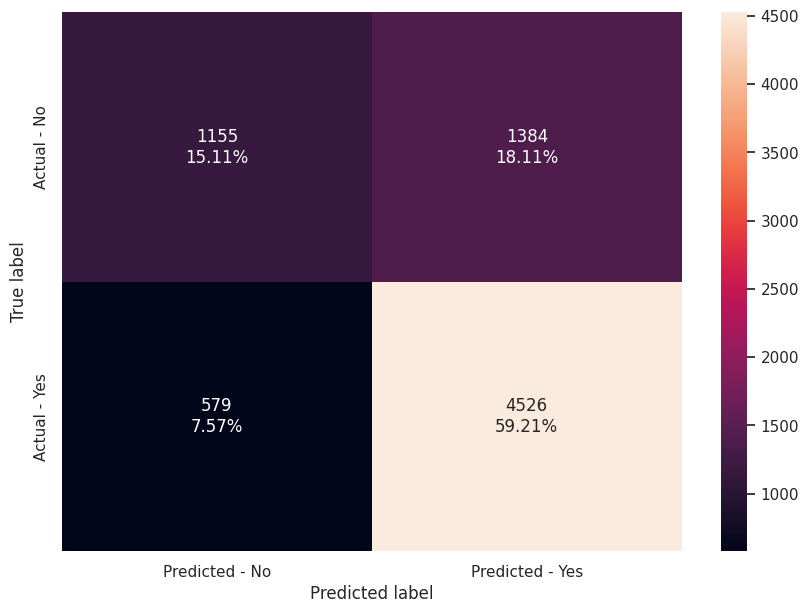

In [104]:
make_confusion_matrix(rf_tuned,y_test)

Decrease in TF and FN.

In [105]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned, X_train,y_train)
print("Training performance \n",rf_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.773884  0.907832   0.786545  0.842848


In [106]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned, X_test,y_test)
print("Training performance \n",rf_tuned_model_test_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.743197  0.886582   0.765821  0.821788


**With hypertune parameters:**

- Both models - Bagging classifiers as well as random forest classifier are overfitting the train data.
- Both models are giving similar performance in terms of F1 but Random Forest classifier is giving a slightly better F1.

In [107]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
education_of_employee_High School  0.239545
prevailing_wage                    0.147533
has_job_experience_Y               0.119699
education_of_employee_Master's     0.083328
no_of_employees                    0.072826
number_of_years_estab              0.058537
unit_of_wage_Year                  0.048575
continent_Europe                   0.044488
education_of_employee_Doctorate    0.044055
region_of_employment_Midwest       0.024187
region_of_employment_West          0.019218
continent_Asia                     0.016419
continent_North America            0.014449
region_of_employment_South         0.014045
full_time_position_Y               0.012993
requires_job_training_Y            0.012136
region_of_employment_Northeast     0.011627
continent_South America            0.008289
continent_Oceania                  0.002958
unit_of_wage_Week                  0.002931
unit_of_wage_Month                 0.002161


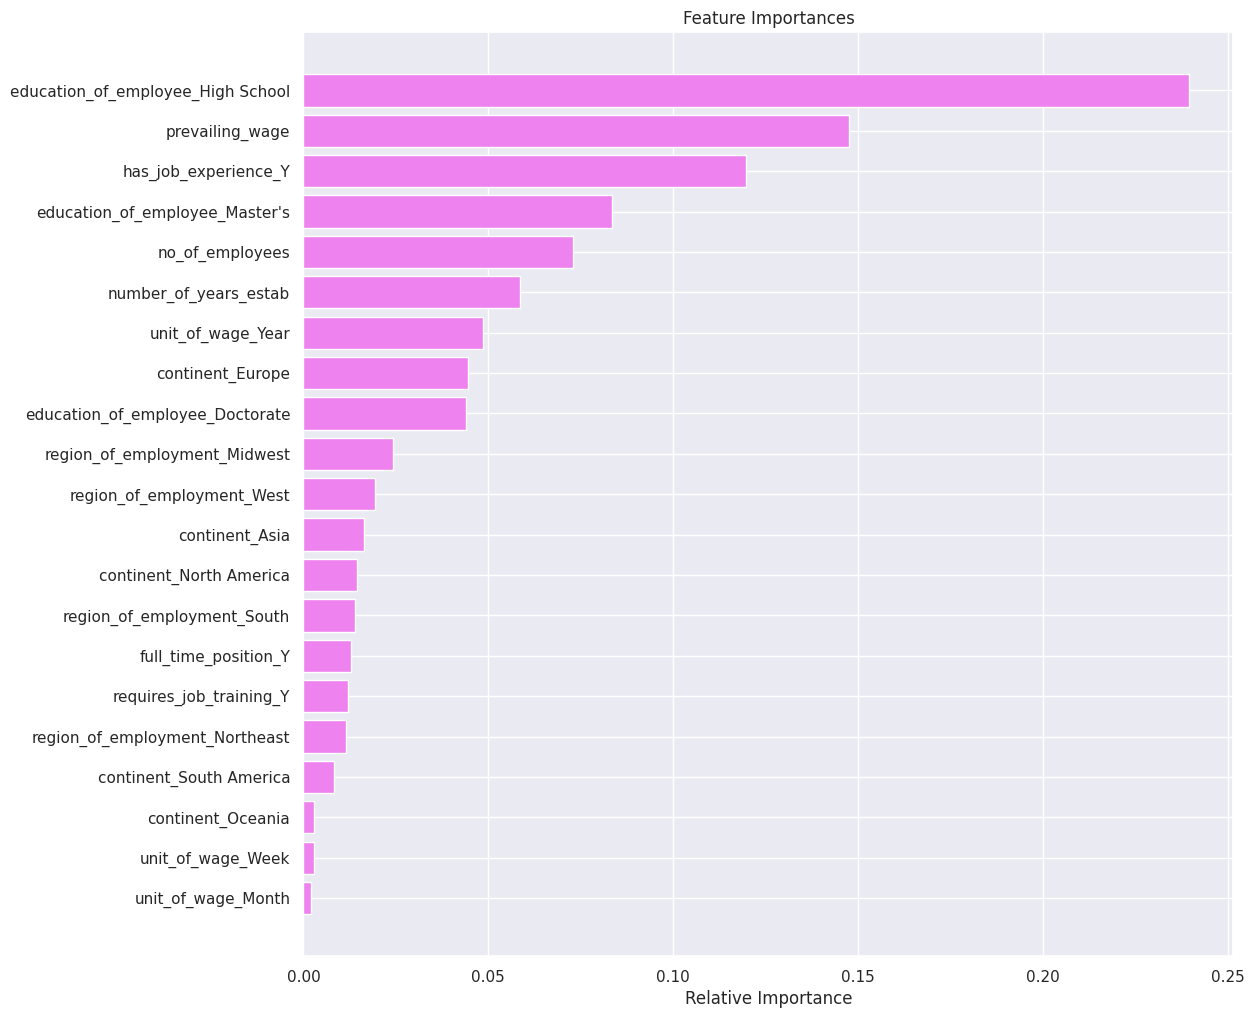

In [110]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* education_of_the_employee_highschool is the most important feature, in addition to prevailing_wage and has_job_experience_Y, for tuned decision tree model

## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Regressor

In [111]:
abc_class = AdaBoostClassifier(random_state=1)
abc_class.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [112]:
abc_class_model_train_perf = model_performance_classification_sklearn(abc_class, X_train,y_train)
print("Training performance \n",abc_class_model_train_perf )

Training performance 
    Accuracy    Recall  Precision       F1
0  0.738226  0.887182   0.760688  0.81908


In [113]:
abc_class_model_test_perf = model_performance_classification_sklearn(abc_class, X_test,y_test)
print("Testing performance \n",abc_class_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.734301  0.885015   0.757799  0.816481


* Adaboost is lower than the previous models by 4%

### Hyperparameter Tuning

In [114]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [115]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned, X_train,y_train)
print("Training performance \n",abc_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.718995  0.781247   0.794587  0.787861


In [116]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned, X_test,y_test)
print("Testing performance \n",abc_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0   0.71651  0.781391   0.791468  0.786397


* We can see that there is no significant improvement in the model after hyperparameter tuning

In [117]:
# importance of features in the tree building

print(pd.DataFrame(abc_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                    Imp
has_job_experience_Y               0.17
education_of_employee_Master's     0.15
education_of_employee_High School  0.14
education_of_employee_Doctorate    0.13
region_of_employment_Midwest       0.11
continent_Europe                   0.10
prevailing_wage                    0.08
region_of_employment_South         0.07
unit_of_wage_Year                  0.04
region_of_employment_West          0.01
unit_of_wage_Week                  0.00
unit_of_wage_Month                 0.00
region_of_employment_Northeast     0.00
no_of_employees                    0.00
requires_job_training_Y            0.00
continent_South America            0.00
continent_Oceania                  0.00
continent_North America            0.00
continent_Asia                     0.00
number_of_years_estab              0.00
full_time_position_Y               0.00


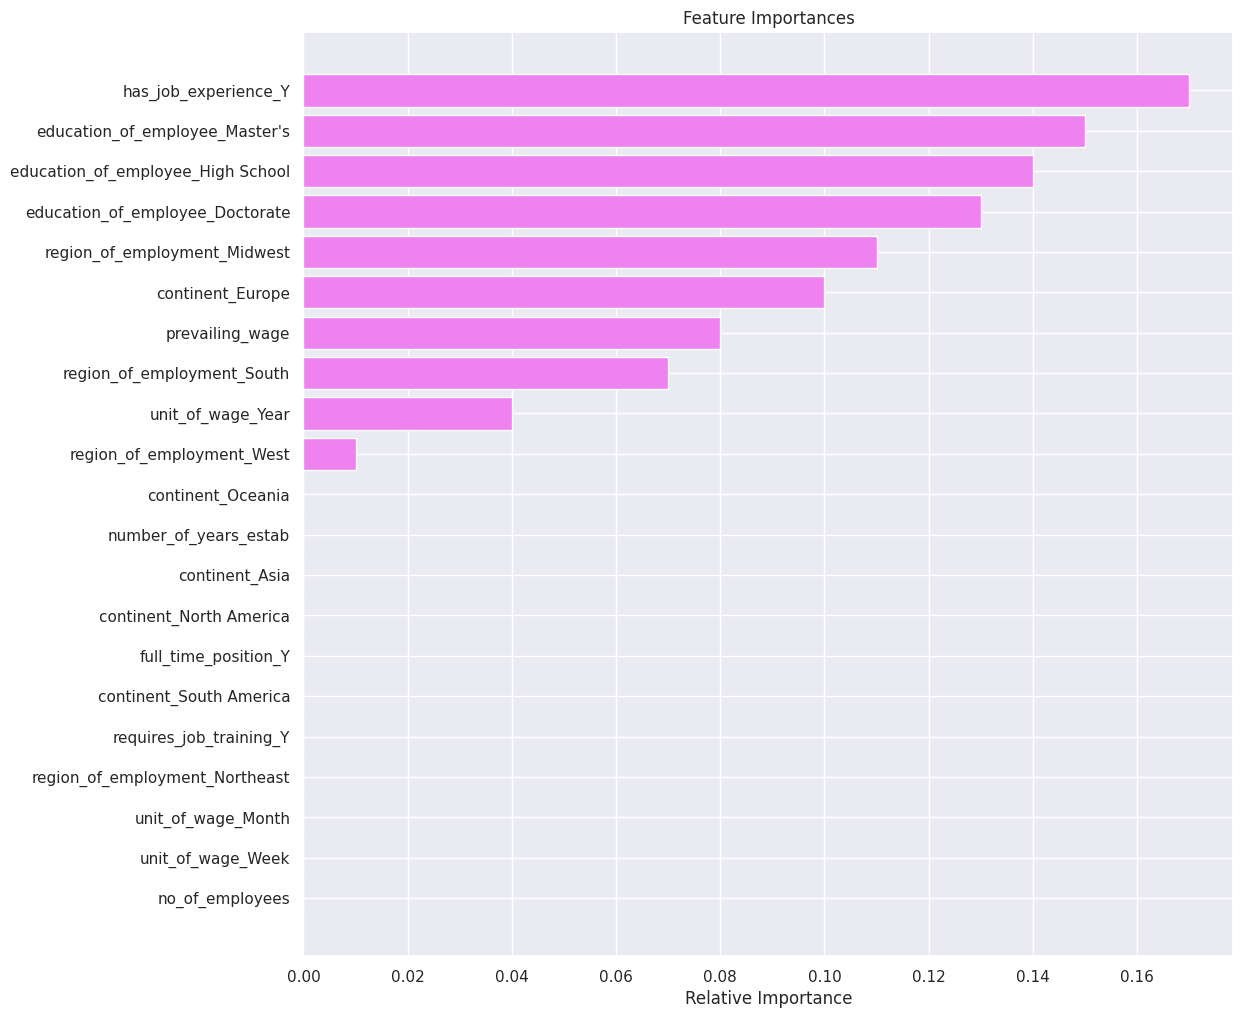

In [118]:
feature_names = X_train.columns
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* In the model education_of_employee_High School remains significant but has_job_experience_Y has a slight improvement over prevailing_wage unlike in the last model where the two were flipped flopped.  Also these three lowered in percentage in comparison to the the rf_tune model

### Gradient Boosting Regressor

In [119]:
gb_classifier=GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [120]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(gb_classifier, X_train,y_train)
print("Training performance \n",gb_classifier_model_train_perf)

Training performance 
    Accuracy   Recall  Precision        F1
0  0.758802  0.88374   0.783042  0.830349


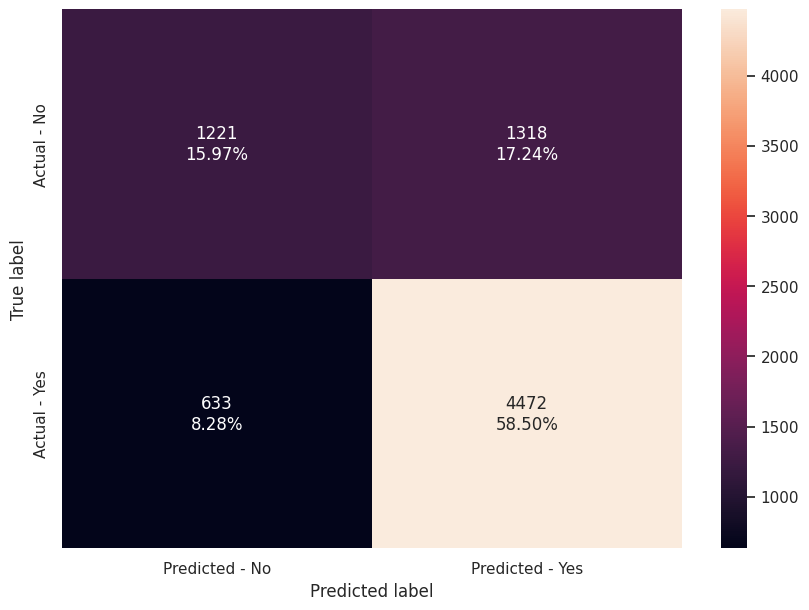

In [128]:
make_confusion_matrix(gb_classifier,y_test)

In [121]:
gb_classifier_model_test_perf = model_performance_classification_statsmodels(gb_classifier, X_test, y_test)
print("Testing performance \n",gb_classifier_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.744767  0.876004   0.772366  0.820927


* Gradient Boost has a slight improvement but not an overwhelming change

### Hyperparameter Tuning

In [125]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {'n_estimators': [200,250], 
              'subsample':[0.9,1],
              'max_features':[0.8,0.9],
              'learning_rate':[0.1, 0.21, 0.1]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=200, random_state=1,
                           subsample=0.9)

In [126]:
gbc_tuned_model_train_perf = model_performance_classification_statsmodels(gbc_tuned, X_train,y_train)
print("Training performance \n",gbc_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.763961  0.884244   0.788178  0.833452


In [127]:
gbc_tuned_model_test_perf = model_performance_classification_statsmodels(gbc_tuned, X_test, y_test)
print("Testing performance \n",gbc_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.743851  0.872086   0.773319  0.819739


* No change from this last model

In [129]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(gbc_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
education_of_employee_High School  0.240993
has_job_experience_Y               0.143605
prevailing_wage                    0.143488
education_of_employee_Master's     0.093973
education_of_employee_Doctorate    0.081290
continent_Europe                   0.055191
no_of_employees                    0.045774
unit_of_wage_Year                  0.044792
region_of_employment_Midwest       0.035289
number_of_years_estab              0.026242
region_of_employment_South         0.017839
continent_North America            0.015342
region_of_employment_West          0.014097
continent_South America            0.010515
region_of_employment_Northeast     0.007619
continent_Asia                     0.007568
full_time_position_Y               0.006390
requires_job_training_Y            0.006239
continent_Oceania                  0.002557
unit_of_wage_Week                  0.000832
unit_of_wage_Month                 0.000366


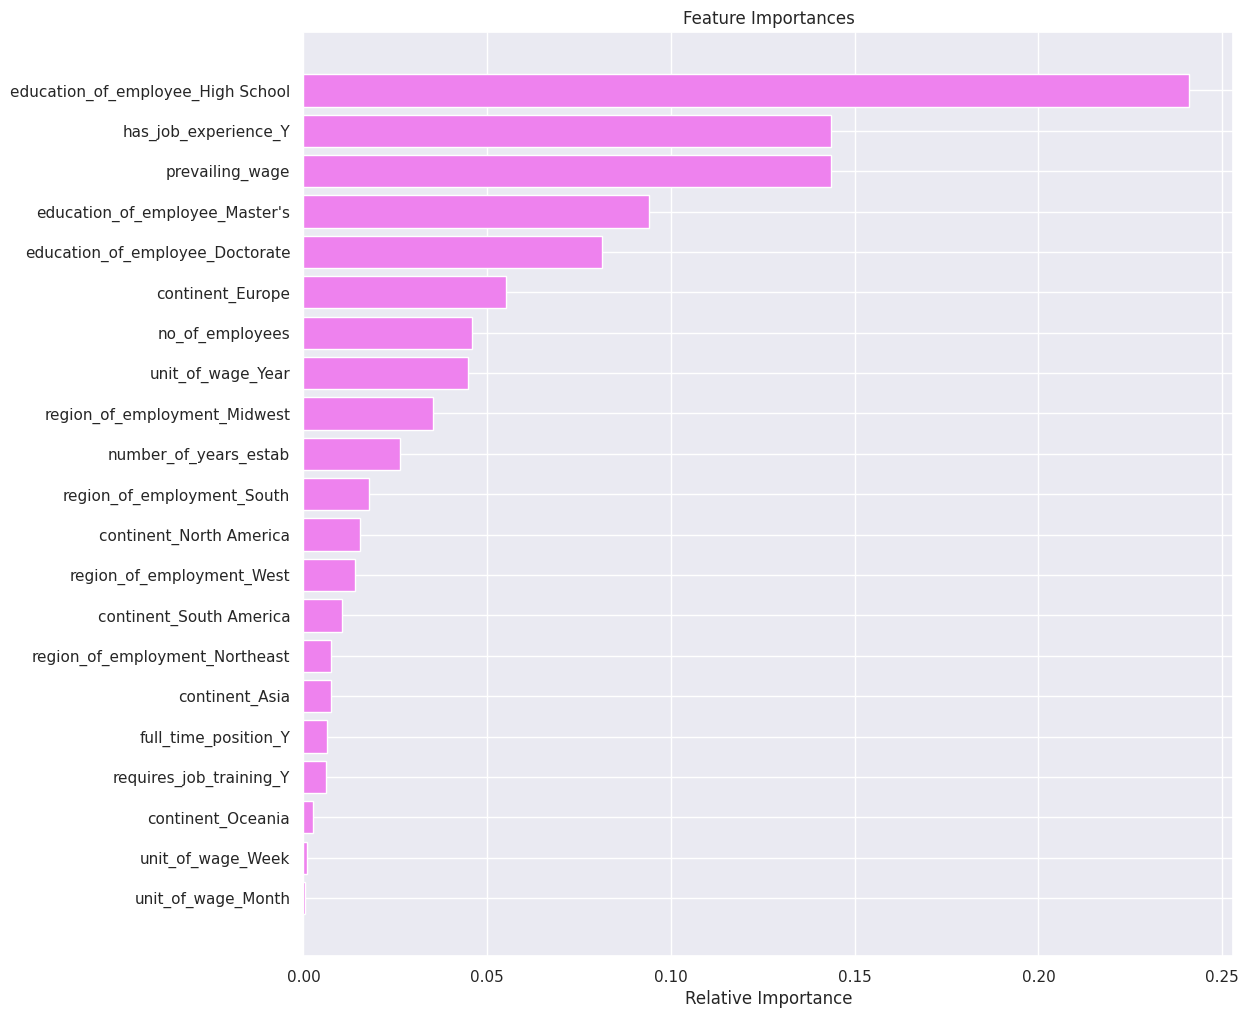

In [130]:
feature_names = X_train.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* The percentages were sliced in half in comparison to the Adaboost model. 

### XGBoost Regressor

In [131]:
xgb_estimator=XGBClassifier(random_state=1, eval_metric="logloss")
xgb_estimator.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

In [132]:
xgb_estimator_model_train_perf = model_performance_classification_statsmodels(xgb_estimator, X_train, y_train)
print("Training performance \n",xgb_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.838753  0.931419   0.843482  0.885272


In [133]:
xgb_estimator_model_test_perf = model_performance_classification_statsmodels(xgb_estimator, X_test,y_test)
print("Testing performance \n",xgb_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.733255  0.860921    0.76782  0.811709


* This model had a 5% increase in the training
* The Testing took a small almost not worth mentioning decrease of .009%

### Hyperparameter Tuning

In [134]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(150,250,50),
              'scale_pos_weight': [1,2,], 
              'subsample':[0.9, 1],
              'learning_rate': np.arange(0.1,.21,0.1),
              'gamma':[3, 5],
              'colsample_bytree':[0.8, 0.9],
              'colsample_bylevel':[0.9, 1]
              }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=5, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [135]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned, X_train, y_train)
print("Training performance \n",xgb_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.766315  0.881978   0.791846  0.834485


In [136]:
xgb_tuned_model_test_perf = model_performance_classification_sklearn(xgb_tuned, X_test, y_test)
print("Testing performance \n",xgb_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.747645  0.872478   0.777041  0.821999


* No significant change from the previous models

In [137]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
education_of_employee_High School  0.335503
has_job_experience_Y               0.111469
education_of_employee_Master's     0.091702
education_of_employee_Doctorate    0.079020
continent_Europe                   0.053217
unit_of_wage_Year                  0.042765
region_of_employment_Northeast     0.030469
region_of_employment_Midwest       0.030322
region_of_employment_South         0.029645
region_of_employment_West          0.027068
continent_Asia                     0.025614
prevailing_wage                    0.022914
full_time_position_Y               0.020728
continent_North America            0.016265
unit_of_wage_Week                  0.015152
continent_South America            0.014598
requires_job_training_Y            0.014358
unit_of_wage_Month                 0.010627
number_of_years_estab              0.010243
no_of_employees                    0.009606
continent_Oceania                  0.008714


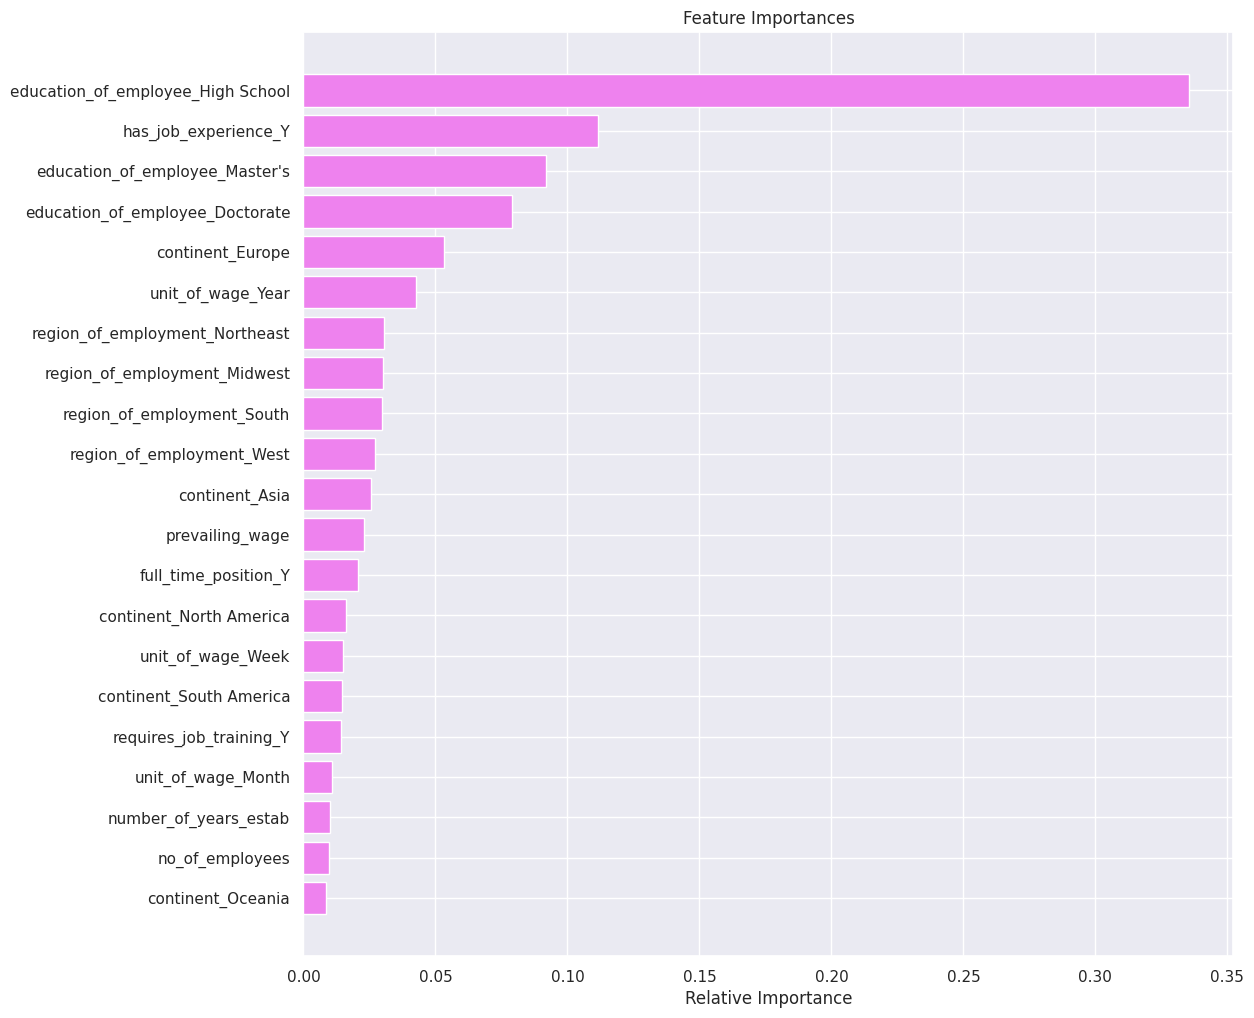

In [138]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* education_of_employee_High Scool decreased from 44% to 33% using this model
* has_job_experience_Y decreased as well to 11%
* education of Master's & Doctorate portrays an importance but not significant when compared to the other models

## Stacking Model

**Now, let's build a stacking model with the tuned models - decision tree, random forest, and gradient boosting, then use XGBoost to get the final prediction.**

In [139]:
estimators = [
    ("AdaBoost", abc_tuned),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5) ## Complete the code to define Stacking Classifier

stacking_classifier.fit(X_train,y_train) ## Complete the code to fit Stacking Classifier on the train data

StackingClassifier(cv=5,
                   estimators=[('AdaBoost',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                         max_depth=1,
                                                                                         random_state=1),
                                                   learning_rate=0.1,
                                                   n_estimators=100,
                                                   random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsa...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.1,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=200, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None, random_state=1, ...))

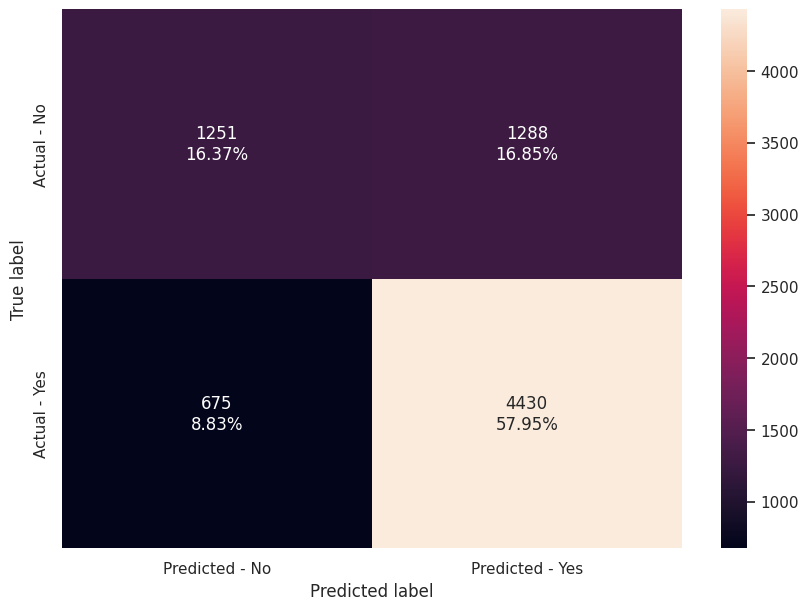

In [140]:
make_confusion_matrix(stacking_classifier,y_test)

* Stacking has been the best model at predicting correctly TP & TN in comparison to the other models.

In [141]:
stacking_classifier_model_train_perf = model_performance_classification_sklearn(xgb_tuned, X_train, y_train) ## Complete the code to check performance for test data
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.766315,0.881978,0.791846,0.834485


In [142]:
stacking_classifier_model_test_perf = model_performance_classification_sklearn(xgb_tuned, X_test, y_test) ## Complete the code to check performance for test data
stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.747645,0.872478,0.777041,0.821999


## Model Performance Comparison and Conclusions

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

In [143]:
from google.colab import data_table
data_table.DataTable(models_train_comp_df)

,0,0,0,0,0,Accuracy,Recall,Precision,F1,0,0,0,0,0,0,0
Accuracy,0.712548,0.706567,0.985198,0.994057,1.0,NaN,NaN,NaN,NaN,0.738226,0.718995,0.758802,0.763961,0.838753,0.766315,0.766315
Recall,0.931923,0.930852,0.986066,0.999748,1.0,NaN,NaN,NaN,NaN,0.887182,0.781247,0.883740,0.884244,0.931419,0.881978,0.881978
Precision,0.720067,0.715447,0.991726,0.991426,1.0,NaN,NaN,NaN,NaN,0.760688,0.794587,0.783042,0.788178,0.843482,0.791846,0.791846
F1,0.812411,0.809058,0.988888,0.995570,1.0,NaN,NaN,NaN,NaN,0.819080,0.787861,0.830349,0.833452,0.885272,0.834485,0.834485
0,NaN,NaN,NaN,NaN,NaN,0.773884,0.907832,0.786545,0.842848,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf,
        abc_class_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_estimator_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-144-a7a44b3623d7>", line 21, in <cell line: 21>
    models_test_comp_df.columns = [
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 5915, in __setattr__
    return object.__setattr__(self, name, value)
  File "pandas/_libs/properties.pyx", line 69, in pandas._libs.properties.AxisProperty.__set__
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 823, in _set_axis
    self._mgr.set_axis(axis, labels)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 230, in set_axis
    self._validate_set_axis(axis, new_labels)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/base.py", line 70, in _validate_set_axis
    raise ValueError(
ValueError: Length mismatch: Expected

In [144]:
from google.colab import data_table
data_table.DataTable(models_test_comp_df)

,0,0,0,0,0,Accuracy,Recall,Precision,F1,0,0,0,0,0,0,0
Accuracy,0.657248,0.706567,0.694662,0.729461,0.721088,NaN,NaN,NaN,NaN,0.734301,0.716510,0.744767,0.743851,0.733255,0.747645,0.747645
Recall,0.740646,0.930852,0.765916,0.900294,0.833888,NaN,NaN,NaN,NaN,0.885015,0.781391,0.876004,0.872086,0.860921,0.872478,0.872478
Precision,0.744731,0.715447,0.774411,0.746710,0.768273,NaN,NaN,NaN,NaN,0.757799,0.791468,0.772366,0.773319,0.767820,0.777041,0.777041
F1,0.742683,0.809058,0.770140,0.816341,0.799737,NaN,NaN,NaN,NaN,0.816481,0.786397,0.820927,0.819739,0.811709,0.821999,0.821999
0,NaN,NaN,NaN,NaN,NaN,0.743197,0.886582,0.765821,0.821788,NaN,NaN,NaN,NaN,NaN,NaN,NaN


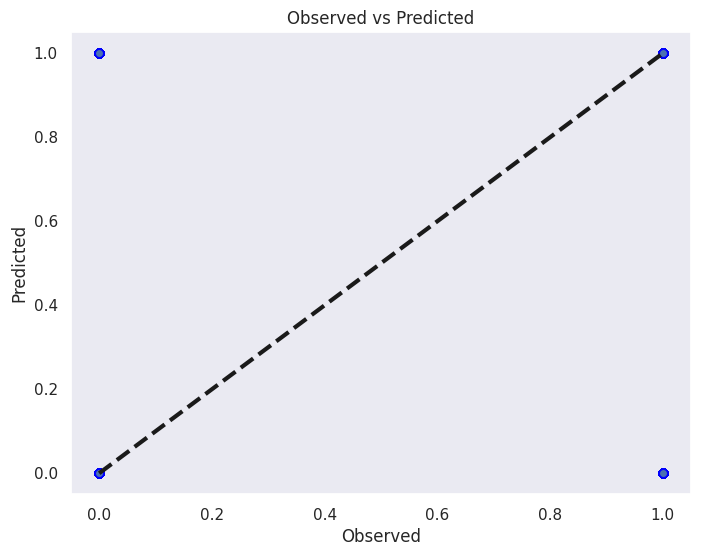

In [145]:
# So plot observed and predicted values of the test data for the best model i.e. tuned gradient boosting model
fig, ax = plt.subplots(figsize=(8, 6))
y_pred=gbc_tuned.predict(X_test)
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.set_title("Observed vs Predicted")
plt.grid()
plt.show()

## Actionable Insights and Recommendations

* Education plays a significant in role in those who are certified.  Applicants with higher level education are less likely to have their visa's denied.  Those with a doctorate mostly get approved, becasue they probably a have a in demand skillset.  On the other hand those with a high school education were 2/3 less likely to get their visa approved. And those without any education were not mentioned
* Whether or not someone has job experience is significant in selecting candiates as employers maybe less likely to hire visa applicants for highs skills that require government oversight
* Europe was the only country that had almost an 80% certfied approval rate and South America had the lowest around 58%
* One of main information data points missing from the dataset is denial critera. The models don't have the denial areas insuggested and just the bare minimum information, 
* Yearly wage was important to the applicant, but what measures are used to balance applicants and the US worker?  If wages are to low no one will apply but if they are high then jobs in America are attractive.
* Whether someone has considered full/part time job was at the bottom of every model which is interest, but maybe applicants are looking to get to the U.S. even if the job is not promised as parttime jobs are be cancelled at a moments notice.
* gbc_tuned has the best match to the EDA analyzed at the begining of the project.
